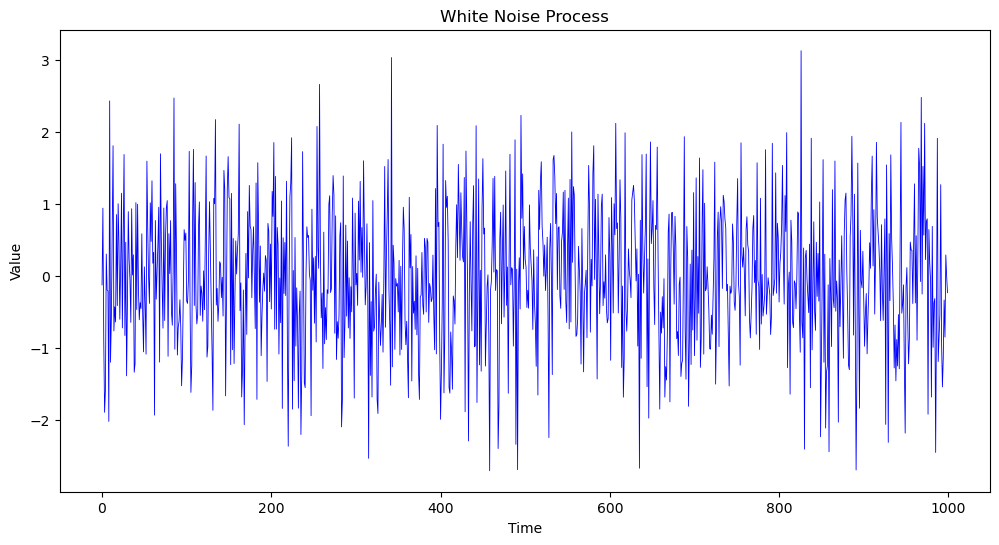

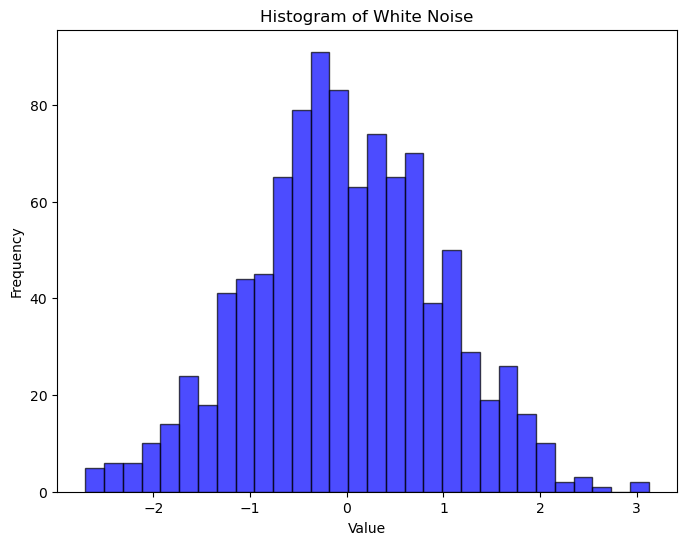

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                          ARIMA   Log Likelihood               -1393.889
Date:                Mon, 29 Jul 2024   AIC                           2791.778
Time:                        11:29:01   BIC                           2801.594
Sample:                             0   HQIC                          2795.509
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.031     -0.792      0.428      -0.085       0.036
sigma2         0.9511      0.044     21.831      0.000       0.866       1.037
Ljung-Box (L1) (Q):                   0.10   Jarque-

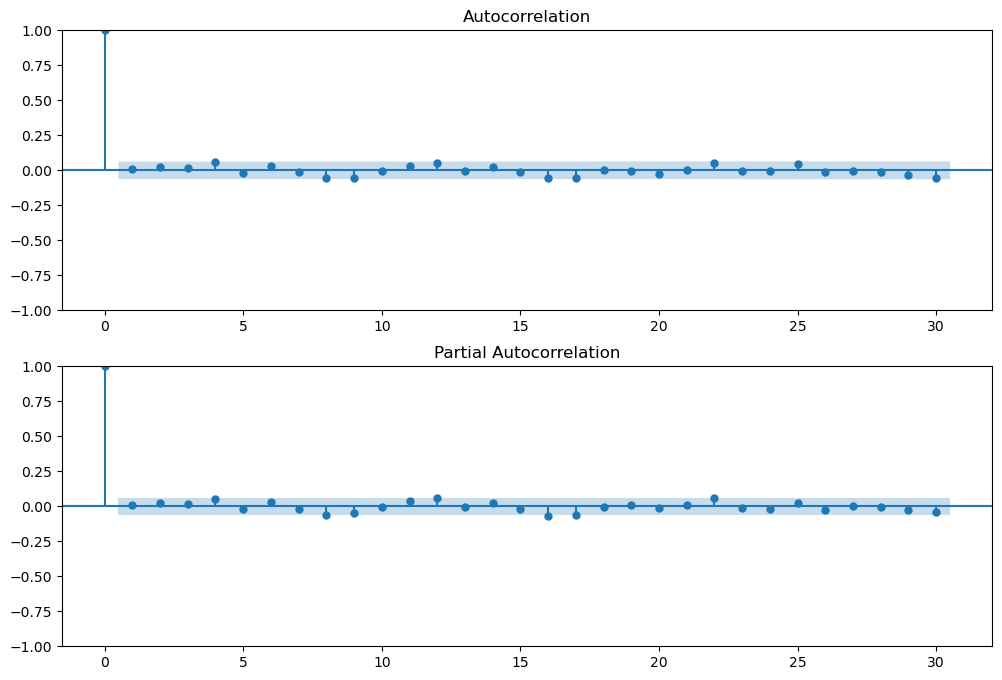

      lb_stat  lb_pvalue
1    0.101136   0.750471
2    0.596019   0.742294
3    0.795812   0.850468
4    3.905831   0.418900
5    4.330367   0.502895
6    5.190395   0.519636
7    5.426272   0.608091
8    8.896788   0.351078
9   11.781481   0.225911
10  11.837468   0.296081
Mean: -0.024425480702892848
Variance: 0.951135297901289


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from typing import Tuple, Optional

# Constants
FIG_SIZE_LARGE = (12, 6)
FIG_SIZE_MEDIUM = (8, 6)

def generate_white_noise(n: int = 1000, mean: float = 0, std_dev: float = 1) -> np.ndarray:
    """
    Generate white noise series.

    Args:
        n: Number of data points.
        mean: Mean of the white noise.
        std_dev: Standard deviation of the white noise.

    Returns:
        Generated white noise series.
    """
    return np.random.normal(mean, std_dev, n)

def plot_series(series: np.ndarray, title: str = 'Time Series', xlabel: str = 'Time', ylabel: str = 'Value', save_path: Optional[str] = None) -> None:
    """
    Plot a time series.

    Args:
        series: Time series data.
        title: Title of the plot.
        xlabel: X-axis label.
        ylabel: Y-axis label.
        save_path: Path to save the plot. If None, the plot is displayed.
    """
    plt.figure(figsize=FIG_SIZE_LARGE)
    plt.plot(series, color='blue', linewidth=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_path:
        plt.savefig(save_path)
    plt.show()

def plot_histogram(series: np.ndarray, bins: int = 30, title: str = 'Histogram', xlabel: str = 'Value', ylabel: str = 'Frequency', save_path: Optional[str] = None) -> None:
    """
    Plot a histogram of a series.

    Args:
        series: Data series.
        bins: Number of bins for the histogram.
        title: Title of the plot.
        xlabel: X-axis label.
        ylabel: Y-axis label.
        save_path: Path to save the plot. If None, the plot is displayed.
    """
    plt.figure(figsize=FIG_SIZE_MEDIUM)
    plt.hist(series, bins=bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_path:
        plt.savefig(save_path)
    plt.show()

def fit_arima_model(series: np.ndarray, order: Tuple[int, int, int] = (0, 0, 0)):
    """
    Fit an ARIMA model to a time series.

    Args:
        series: Time series data.
        order: ARIMA model order.

    Returns:
        Fitted ARIMA model results.
    """
    model = ARIMA(series, order=order)
    return model.fit()

def plot_acf_pacf(series: np.ndarray, lags: int = 30, save_path: Optional[str] = None) -> None:
    """
    Plot ACF and PACF of a time series.

    Args:
        series: Time series data.
        lags: Number of lags for ACF and PACF.
        save_path: Path to save the plot. If None, the plot is displayed.
    """
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=ax[0])
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=ax[1])
    if save_path:
        plt.savefig(save_path)
    plt.show()

def perform_ljung_box_test(series: np.ndarray, lags: int = 10):
    """
    Perform Ljung-Box test on a time series.

    Args:
        series: Time series data.
        lags: Number of lags for the test.

    Returns:
        Test results.
    """
    result = acorr_ljungbox(series, lags=lags, return_df=True)
    return result

def main(n: int = 1000, mean: float = 0, std_dev: float = 1, output_dir: Optional[str] = None) -> None:
    try:
        white_noise = generate_white_noise(n, mean, std_dev)
        
        plot_series(white_noise, title='White Noise Process', save_path=f"{output_dir}/white_noise.png" if output_dir else None)
        plot_histogram(white_noise, title='Histogram of White Noise', save_path=f"{output_dir}/histogram.png" if output_dir else None)
        
        model_fit = fit_arima_model(white_noise)
        print(model_fit.summary())
        
        plot_acf_pacf(model_fit.resid, save_path=f"{output_dir}/acf_pacf.png" if output_dir else None)
        
        ljung_box_results = perform_ljung_box_test(model_fit.resid)
        print(ljung_box_results)
        
        calculated_mean = np.mean(white_noise)
        calculated_variance = np.var(white_noise)
        print(f'Mean: {calculated_mean}')
        print(f'Variance: {calculated_variance}')
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    # Check if running in Jupyter
    if 'ipykernel' in sys.modules:
        # If in Jupyter, use default values
        main()
    else:
        # If running as a script, use argparse
        import argparse
        parser = argparse.ArgumentParser(description="Analyze white noise time series.")
        parser.add_argument("--n", type=int, default=1000, help="Number of data points")
        parser.add_argument("--mean", type=float, default=0, help="Mean of white noise")
        parser.add_argument("--std_dev", type=float, default=1, help="Standard deviation of white noise")
        parser.add_argument("--output_dir", type=str, help="Directory to save output files")
        args = parser.parse_args()
        
        main(args.n, args.mean, args.std_dev, args.output_dir)